In [2]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully


/usr/local/src/bluemix_jupyter_bundle.v62/notebook/lib/python2.7/site-packages/bokeh/core/json_encoder.py:52: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  NP_EPOCH = np.datetime64('1970-01-01T00:00:00Z')


Table service_connections created successfully


In [6]:
#Loading the Dataset from External URL
data1= pixiedust.sampleData("https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv")

Downloaded 43739 bytes
Creating pySpark DataFrame for 'https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv'. Please wait...
Loading file using 'SparkSession'
Successfully created pySpark DataFrame for 'https://raw.githubusercontent.com/akhilbh92/spartans/master/annual_aqi_by_county_20171.csv'


In [8]:
display(data1)

State,County,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
Alabama,Baldwin,48,45,3,0,0,0,0,58,49,36,0,0,27,0,21,0
Alabama,Clay,27,20,7,0,0,0,0,66,60,36,0,0,0,0,27,0
Alabama,Colbert,51,47,4,0,0,0,0,63,46,41,0,0,28,0,23,0
Alabama,DeKalb,68,64,4,0,0,0,0,57,45,36,0,0,50,0,18,0
Alabama,Elmore,14,14,0,0,0,0,0,47,47,41,0,0,14,0,0,0
Alabama,Etowah,87,54,33,0,0,0,0,90,62,47,0,0,7,0,80,0
Alabama,Houston,49,44,4,1,0,0,0,131,51,38,0,0,27,0,22,0
Alabama,Jefferson,120,49,67,4,0,0,0,116,79,54,0,2,28,30,60,0
Alabama,Madison,45,44,1,0,0,0,0,65,43,10,0,0,0,0,18,27
Alabama,Mobile,90,71,17,2,0,0,0,139,53,40,0,0,18,2,70,0


In [34]:
#List of States in the Survey
print "Total No of States in the Survey",data1.select("State").distinct().count()
data1.select("State").distinct().show(49)

Total No of States in the Survey 49
+--------------------+
|               State|
+--------------------+
|                Utah|
|              Hawaii|
|   Country Of Mexico|
|           Minnesota|
|                Ohio|
|            Arkansas|
|District Of Columbia|
|               Texas|
|        North Dakota|
|        Pennsylvania|
|         Connecticut|
|            Nebraska|
|              Nevada|
|          Washington|
|            Illinois|
|            Oklahoma|
|            Delaware|
|              Alaska|
|          New Mexico|
|       West Virginia|
|            Missouri|
|        Rhode Island|
|             Georgia|
|             Montana|
|            Michigan|
|            Virginia|
|      North Carolina|
|             Wyoming|
|              Kansas|
|          New Jersey|
|            Maryland|
|             Alabama|
|             Arizona|
|                Iowa|
|       Massachusetts|
|            Kentucky|
|           Louisiana|
|         Mississippi|
|       New Hampshire

In [30]:
#List the states with their corresponding no of counties 
data1.groupby('State').agg({'County': 'count'}).show(50)

+--------------------+-------------+
|               State|count(County)|
+--------------------+-------------+
|                Utah|           12|
|              Hawaii|            4|
|   Country Of Mexico|            1|
|           Minnesota|            1|
|                Ohio|           41|
|            Arkansas|           11|
|District Of Columbia|            1|
|               Texas|           46|
|        North Dakota|           11|
|        Pennsylvania|            6|
|         Connecticut|            1|
|            Nebraska|            8|
|              Nevada|            4|
|          Washington|           28|
|            Illinois|           26|
|            Oklahoma|           26|
|            Delaware|            3|
|              Alaska|            3|
|          New Mexico|            2|
|       West Virginia|           13|
|            Missouri|           22|
|        Rhode Island|            3|
|             Georgia|           30|
|             Montana|           15|
|

In [41]:
# Visualize the Number of Counties in each State participated in the Survey

visual_data = data1.groupBy("State").count()
display(visual_data)

In [61]:
data1.registerTempTable("aqitable")
lasDF = sqlContext.sql("""
SELECT State,COUNT(County) AS No_Of_Counties FROM aqitable group by State order by No_Of_Counties desc
""")
lasDF.show(25)
display(lasDF)


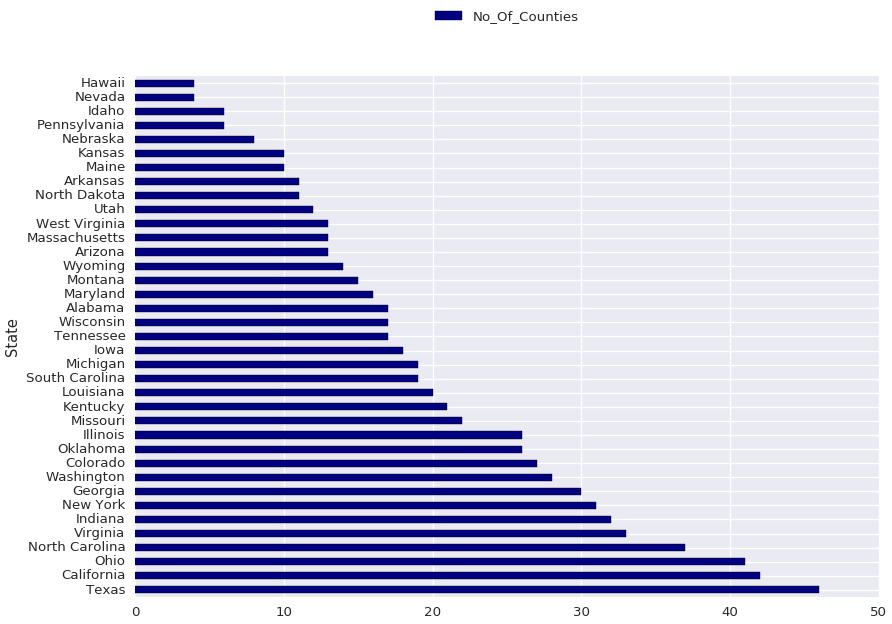

In [72]:
#List and visualize the states having more than 3 counties in the survey
data1.registerTempTable("aqitable")
lasDF = sqlContext.sql("""
SELECT * from (SELECT State,COUNT(County) AS No_Of_Counties FROM aqitable group by State order by No_Of_Counties desc) temptab where temptab.No_Of_Counties >3
""")
lasDF.show(50)
display(lasDF)